In [1]:
%pylab inline
import pandas
import seaborn

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pandas.read_csv('C:/Users/PC/Desktop/Uber-trip-data/uber-raw-data-apr14.csv')

In [3]:
data.tail()


,Date/Time,Lat,Lon,Base
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764
564515,4/30/2014 23:48:00,40.6880,-73.9608,B02764


In [4]:
data 

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512
...,...,...,...,...
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764


  add some useful columns and convert datetime

In [5]:
data['Date/Time'] = data['Date/Time'].map(pandas.to_datetime)

In [6]:
data.tail()

,Date/Time,Lat,Lon,Base
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764


In [7]:
dt = data['Date/Time'][564]

In [9]:
dt

Timestamp('2014-04-01 16:06:00')

In [10]:
def get_dom(dt):
    return dt.day

data['dom'] = data['Date/Time'].map(get_dom)

In [11]:
data.tail()

,Date/Time,Lat,Lon,Base,dom
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30


In [12]:

def get_weekday(dt):
    return dt.weekday()

data['weekday'] = data['Date/Time'].map(get_weekday)

def get_hour(dt):
    return dt.hour

data['hour'] = data['Date/Time'].map(get_hour)

data.tail()

,Date/Time,Lat,Lon,Base,dom,weekday,hour
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30,2,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30,2,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30,2,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,2,23
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30,2,23


analyze the DoM

Text(0.5, 1.0, 'Frequency by DoM - uber - Apr 2014')

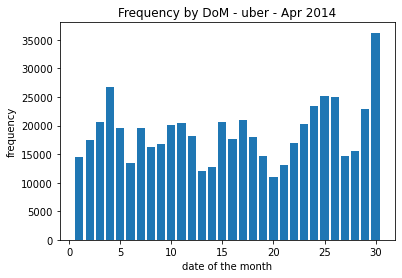

In [15]:
hist(data.dom, bins=30, rwidth=.8, range=(0.5, 30.5))
xlabel('date of the month')
ylabel('frequency')
title('Frequency by DoM - uber - Apr 2014')

(array([52721., 59680., 52581., 58631., 45427., 56764., 38781., 60673.,
        64697., 74561.]),
 array([ 1. ,  3.9,  6.8,  9.7, 12.6, 15.5, 18.4, 21.3, 24.2, 27.1, 30. ]),
 <a list of 10 Patch objects>)

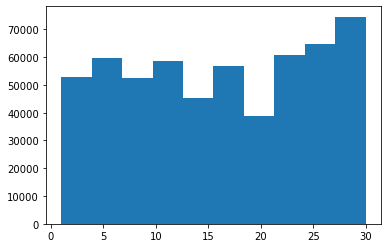

In [16]:
hist(data.dom)

In [17]:
def count_rows(rows):
    return len(rows)

by_date = data.groupby('dom').apply(count_rows)
by_date

dom
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

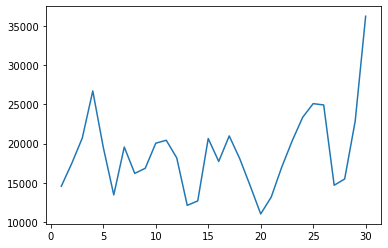

In [18]:
plot(by_date)

<BarContainer object of 30 artists>

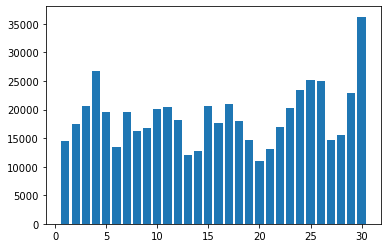

In [19]:
bar(range(1, 31), by_date)

In [20]:
by_date_sorted = by_date.sort_values()
by_date_sorted

dom
20    11017
13    12112
14    12674
21    13162
6     13445
1     14546
19    14602
27    14677
28    15475
8     16188
9     16843
22    16975
2     17474
16    17717
18    18074
12    18170
5     19521
7     19550
10    20041
23    20346
11    20420
15    20641
3     20701
17    20973
29    22835
24    23352
26    24925
25    25095
4     26714
30    36251
dtype: int64

''

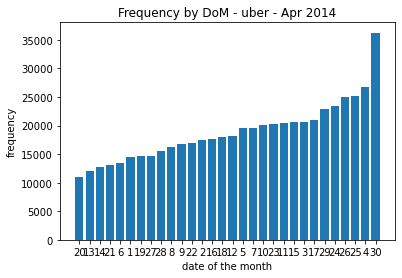

In [24]:
bar(range(1, 31), by_date_sorted)
xticks(range(1,31), by_date_sorted.index)
xlabel('date of the month')
ylabel('frequency')
title('Frequency by DoM - uber - Apr 2014')
;

the hour analyze


(array([ 24614.,  11135.,  27974.,  65706.,  36639.,  42028., 104517.,
         88478.,  75167.,  88258.]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <a list of 10 Patch objects>)

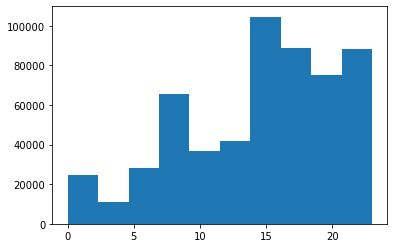

In [25]:
hist(data.hour)

(array([ 7769.,  4935.,  5040.,  6095.,  9476., 18498., 24924., 22843.,
        17939., 17865., 18774., 19425., 22603., 27190., 35324., 42003.,
        45475., 43003., 38923., 36244., 36964., 30645., 20649.,     0.]),
 array([ 0.5       ,  1.47916667,  2.45833333,  3.4375    ,  4.41666667,
         5.39583333,  6.375     ,  7.35416667,  8.33333333,  9.3125    ,
        10.29166667, 11.27083333, 12.25      , 13.22916667, 14.20833333,
        15.1875    , 16.16666667, 17.14583333, 18.125     , 19.10416667,
        20.08333333, 21.0625    , 22.04166667, 23.02083333, 24.        ]),
 <a list of 24 Patch objects>)

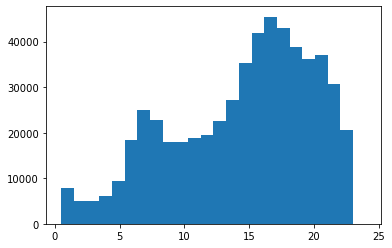

In [27]:
hist(data.hour, bins=24, range=(.5, 24))

analyze the weekday

([<matplotlib.axis.XTick at 0x15d49426880>,
 [Text(0, 0, 'Mon'),
  Text(0, 0, 'Tue'),
  Text(0, 0, 'Wed'),
  Text(0, 0, 'Thu'),
  Text(0, 0, 'Fri'),
  Text(0, 0, 'Sat'),
  Text(0, 0, 'Sun')])

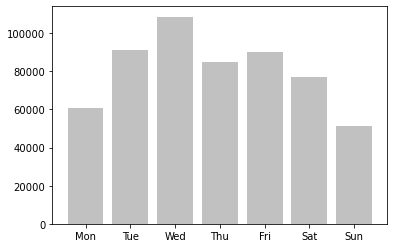

In [31]:
hist(data.weekday, bins=7, range =(-.5,6.5), rwidth=.8, color='#646464',alpha=.4)
xticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split())

cross analysis (hour, dow).